### Predicting Boston Housing Prices. The file BostonHousing.csv contains information collected by the US Bureau of the Census concerning housing in the area of Boston, Massachusetts. The dataset includes information on 506 census housing tracts in the Boston area. The goal is to predict the median house price in new tracts based on information such as crime rate, pollution, and number of rooms. The dataset contains 13 predictors, and the outcome variable is the median house price (MEDV). Table 6.11 describes each of the predictors and the outcome variable.

#### b. Fit a multiple linear regression model to the median house price (MEDV) as a function of CRIM, CHAS, and RM. Write the equation for predicting the median house price from the predictors in the model.

In [1]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

In [2]:
boston_df = pd.read_csv('C:\\Users\\101359755\\BostonHousing.csv')

In [3]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


In [4]:
predictors = ['CRIM', 'CHAS', 'RM']
outcome = 'MEDV'

In [5]:
predictors

['CRIM', 'CHAS', 'RM']

In [6]:
outcome

'MEDV'

In [7]:
X = boston_df[predictors]
y = boston_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [8]:
reg = LinearRegression()
reg.fit(train_X, train_y)

LinearRegression()

In [9]:
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': reg.coef_}))


  Predictor  coefficient
0      CRIM    -0.240062
1      CHAS     3.266817
2        RM     8.325175


In [10]:
print(pd.DataFrame({'Predictor': X.columns, 'Intercept': reg.intercept_}))

  Predictor  Intercept
0      CRIM -29.193467
1      CHAS -29.193467
2        RM -29.193467


In [11]:
# evaluate performance
# training
regressionSummary(train_y, reg.predict(train_X))
# validation
regressionSummary(valid_y, reg.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 5.9666
            Mean Absolute Error (MAE) : 3.9668
          Mean Percentage Error (MPE) : -7.2747
Mean Absolute Percentage Error (MAPE) : 22.5927

Regression statistics

                      Mean Error (ME) : 0.1174
       Root Mean Squared Error (RMSE) : 6.4125
            Mean Absolute Error (MAE) : 4.4558
          Mean Percentage Error (MPE) : -7.6160
Mean Absolute Percentage Error (MAPE) : 23.1676


#### c. Using the estimated regression model, what median house price is predicted for a tract in the Boston area that does not bound the Charles River, has a crime rate of 0.1, and where the average number of rooms per house is 6?

In [12]:
boston_df_C = pd.read_csv('C:\\Users\\101359755\\BostonHousing.csv')
boston_df_C.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9,0


In [13]:
y=boston_df_C[['MEDV']]
X=boston_df_C[['CRIM','CHAS','RM']]
train_X, valid_X, train_y, valid_y = train_test_split(X, y,test_size=0.4, random_state=1)
reg = LinearRegression()
reg.fit(train_X, train_y)

LinearRegression()

In [14]:
print(reg.coef_)

[[-0.24006218  3.26681728  8.3251753 ]]


In [15]:
result=(reg.predict([[0.1,0,6]])).tolist()
round(result[0][0],2)

C:\Users\101359755.GBC.001\Anaconda3\envs\project\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


20.73

### The median house price is $20.73K 

#### d. Reduce the number of predictors: ii. Compute the correlation table for the 12 numerical predictors and search for highly correlated pairs. These have potential redundancy and can ause multicollinearity. Choose which ones to remove based on this table.

In [16]:
! pip install seaborn

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt

In [18]:
boston_df.iloc[:,:12].corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54


<AxesSubplot:>

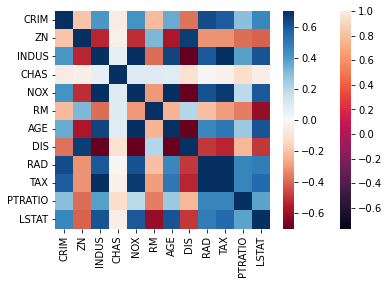

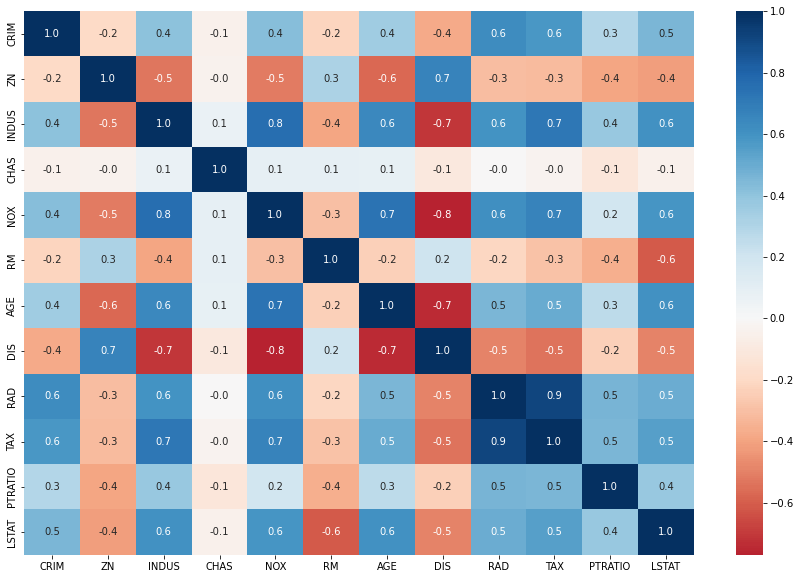

In [19]:
corr = boston_df.iloc[:,:12].corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)
# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, vmin=-0.7, vmax=0.7, cmap="RdBu")
# Include information about values (example demonstrate how to control the size of
# the plot
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

#### The highly correlated pairs and their correlation coefficients are:
#### 1. INDUS & NOX: 0.76
#### 2. INDUS & DIS: -0.71
#### 3. INDUS & TAX: 0.72
#### 4. NOX & DIS: -0.77
#### 5. AGE & DIS: -0.75
#### 6. NOX & AGE: 0.73
#### 7. RAD & TAX: 0.91
#### Looking at the correlation table, the ones that can cause multicollinearity and redundancy are INDUS, AGE and TAX. These can be removed.

#### d.iii. Use three subset selection algorithms: backward, forward, and stepwise) to reduce the remaining predictors. Compute the validation

In [20]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score


In [21]:
exclude_columns = ('MEDV')
predictors = [s for s in boston_df.columns if s not in exclude_columns ]
outcome = 'MEDV'

In [22]:
X = boston_df[predictors]
y = boston_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
reg_1 = LinearRegression()
reg_1.fit(train_X, train_y)


LinearRegression()

1.0


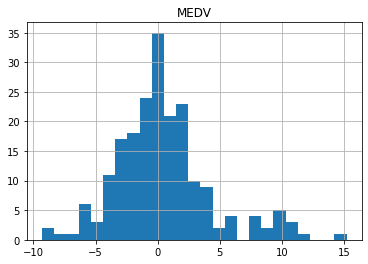

In [23]:
boston_lm_pred = reg_1.predict(valid_X)
all_residuals = valid_y - boston_lm_pred
# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx.
# 75%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))
pd.DataFrame(all_residuals).hist(bins=25)
plt.show()


In [24]:
all_residuals

307     2.672753
343     0.954811
47     -1.287787
67      0.185999
362     1.906649
         ...    
186    11.870992
372    15.199975
442     1.373132
412     9.536524
213     4.874965
Name: MEDV, Length: 203, dtype: float64

In [25]:
#code for backward elimination
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model
def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)
allVariables = train_X.columns
best_model, best_variables = backward_elimination(allVariables, train_model,
 score_model, verbose=True)
print(best_variables)
regressionSummary(train_y, best_model.predict(train_X[best_variables]))
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT, CAT. MEDV
Start: score=1663.52
Step: score=1661.68, remove AGE
Step: score=1660.02, remove ZN
Step: score=1660.02, remove None
['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'CAT. MEDV']

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 3.5875
            Mean Absolute Error (MAE) : 2.6066
          Mean Percentage Error (MPE) : -2.7023
Mean Absolute Percentage Error (MAPE) : 13.2246

Regression statistics

                      Mean Error (ME) : 0.4505
       Root Mean Squared Error (RMSE) : 3.8674
            Mean Absolute Error (MAE) : 2.7724
          Mean Percentage Error (MPE) : -2.1963
Mean Absolute Percentage Error (MAPE) : 13.3441


1.0


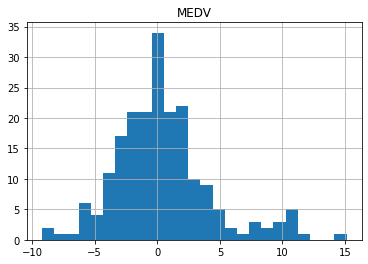

In [26]:
backward_elimination_pred = best_model.predict(valid_X[best_variables])
all_residuals = valid_y - backward_elimination_pred
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))
pd.DataFrame(all_residuals).hist(bins=25)
plt.show()



In [27]:
#Forward Selection
def train_model(variables):
      if len(variables)==0:
       return None
      model = LinearRegression()
      model.fit(train_X[variables], train_y)
      return model

def score_model(model, variables):
           if len(variables) == 0:
             return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
           return AIC_score(train_y, model.predict(train_X[variables]), model)
best_model, best_variables = forward_selection(train_X.columns, train_model,score_model,verbose=True)
print(best_variables)
regressionSummary(train_y, best_model.predict(train_X[best_variables]))
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT, CAT. MEDV
Start: score=2191.75, constant
Step: score=1911.93, add CAT. MEDV
Step: score=1716.45, add LSTAT
Step: score=1699.98, add CRIM
Step: score=1692.34, add CHAS
Step: score=1685.94, add PTRATIO
Step: score=1682.90, add RM
Step: score=1680.20, add DIS
Step: score=1665.78, add NOX
Step: score=1660.42, add RAD
Step: score=1660.42, add None
['CAT. MEDV', 'LSTAT', 'CRIM', 'CHAS', 'PTRATIO', 'RM', 'DIS', 'NOX', 'RAD']

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 3.6137
            Mean Absolute Error (MAE) : 2.6549
          Mean Percentage Error (MPE) : -2.7766
Mean Absolute Percentage Error (MAPE) : 13.5041

Regression statistics

                      Mean Error (ME) : 0.4321
       Root Mean Squared Error (RMSE) : 3.9314
            Mean Absolute Error (MAE) : 2.8585
          Mean Percentage Error (MPE) : -2.3792
Mean Absolute Percentage 

In [28]:
#Stepwise regression
best_model, best_variables = stepwise_selection(train_X.columns, train_model,
score_model,verbose=True)
print(best_variables)
regressionSummary(train_y, best_model.predict(train_X[best_variables]))
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT, CAT. MEDV
Start: score=2191.75, constant
Step: score=1911.93, add CAT. MEDV
Step: score=1716.45, add LSTAT
Step: score=1699.98, add CRIM
Step: score=1692.34, add CHAS
Step: score=1685.94, add PTRATIO
Step: score=1682.90, add RM
Step: score=1680.20, add DIS
Step: score=1665.78, add NOX
Step: score=1660.42, add RAD
Step: score=1660.42, unchanged None
['CAT. MEDV', 'LSTAT', 'CRIM', 'CHAS', 'PTRATIO', 'RM', 'DIS', 'NOX', 'RAD']

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 3.6137
            Mean Absolute Error (MAE) : 2.6549
          Mean Percentage Error (MPE) : -2.7766
Mean Absolute Percentage Error (MAPE) : 13.5041

Regression statistics

                      Mean Error (ME) : 0.4321
       Root Mean Squared Error (RMSE) : 3.9314
            Mean Absolute Error (MAE) : 2.8585
          Mean Percentage Error (MPE) : -2.3792
Mean Absolute Perce

#### On account of lower RMSE and MAPE, the backward model would have to be the best model. 